In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from io_utils import *

In [2]:
dataset_val = 0

In [3]:
if dataset_val == 0:
    dataset =  "PLAsTiCC"
    data_ob = load_PLAsTiCC_data()
    object_ids = data_ob.get_all_object_ids()
    kilonova_ids=data_ob.get_ids_of_event_type(64)
    color_band_dict = {0:'C4',1:'C2', 2:'C3', 3:'C1', 4:'k', 5:'C5'}

In [4]:
def getredshift(data_ob , object_id):
    df_meta_data = data_ob.df_metadata
    index = np.where(df_meta_data['object_id']==object_id)
    red_shift_specz = df_meta_data['hostgal_specz'][index]
    red_shift_photoz = df_meta_data['hostgal_photoz'][index]
    return red_shift_specz, red_shift_photoz

In [5]:
all_object_ids = data_ob.get_all_object_ids()
kilonova_ids=data_ob.get_ids_of_event_type(64)
print(all_object_ids)

object_id
---------
      615
      713
      730
      745
     1124
     1227
     1598
     1632
     1920
     1926
      ...
130678775
130684460
130695262
130698059
130716752
130727624
130739978
130755807
130762946
130772921
130779836
Length = 7848 rows


In [6]:
from LightCurve import LightCurve

In [7]:
flux_and_error_diff = np.abs(data_ob.df_data[data_ob.flux_col_name]) - np.abs(data_ob.df_data[data_ob.flux_err_col_name])
flux_err_ratio = np.abs(data_ob.df_data[data_ob.flux_col_name])>2*data_ob.df_data[data_ob.flux_err_col_name]
index = (np.abs(flux_and_error_diff)>10)&(flux_err_ratio)

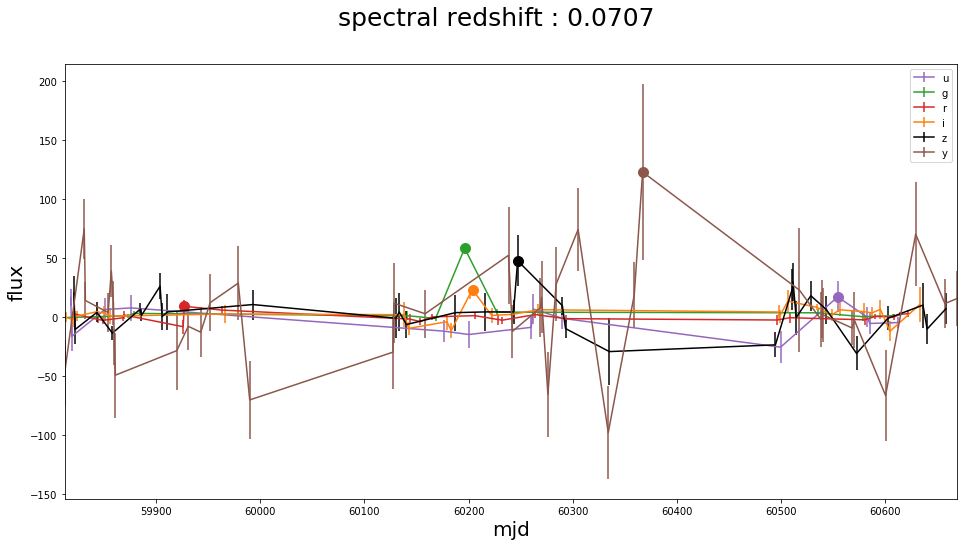

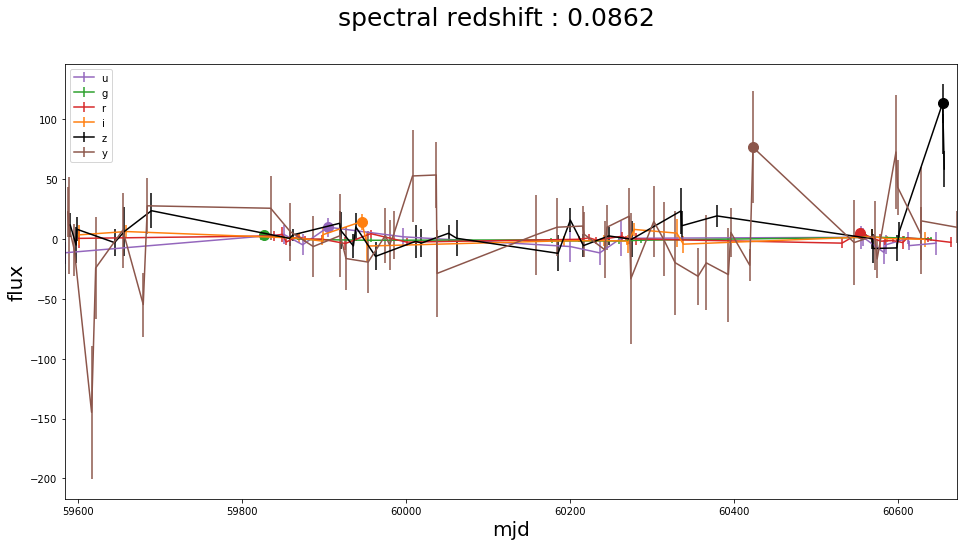

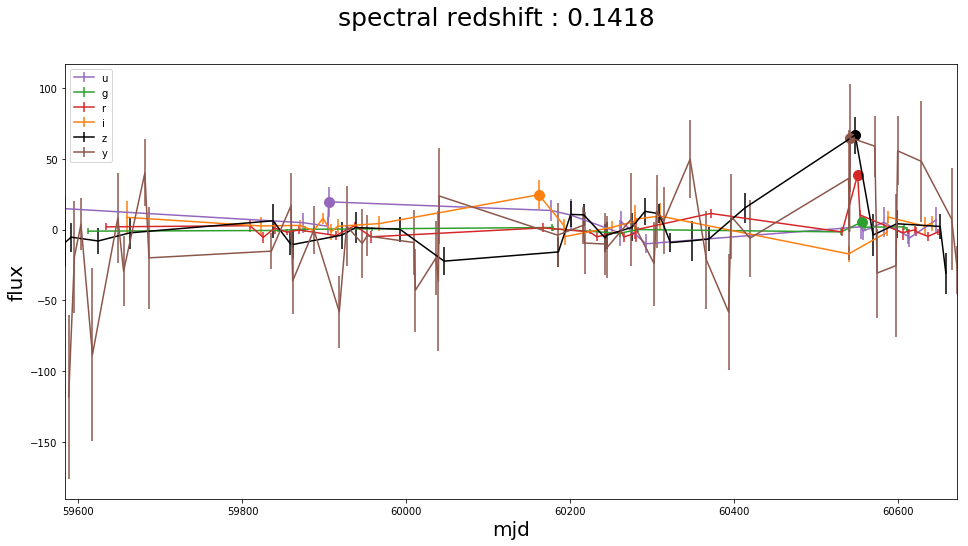

In [8]:
accepted_kilonovae =0
accepted_events = 0

for i, object_id in enumerate(all_object_ids):
    #print(data_ob.df_data[data_ob.object_id_col_name])
    mask = data_ob.df_data[data_ob.object_id_col_name] == object_id
    object_df = data_ob.df_data[mask&index]
    if len(object_df)==0:
        pausibility = 0
        
    else:
    
        max_flux_pos = np.argmax(object_df[data_ob.flux_col_name])

        #length =len(object_df['mjd'])
        max_flux_date = object_df[data_ob.time_col_name][max_flux_pos]
        max_flux_val = object_df[data_ob.flux_col_name][max_flux_pos]
        #print(object_df['flux_err'])


        time_from_max = np.abs(object_df[data_ob.time_col_name] - max_flux_date)
        time_from_max[np.where(time_from_max<7)] = 0
        #filtered_flux = object_df['flux']
        length = np.sum(np.where(time_from_max>=0))

        #normalization = np.sum(index_greater_than_half)
        pausibility = np.sum(np.abs(object_df[data_ob.flux_col_name])*np.abs(time_from_max))/max_flux_val
        #print(pausibility)
        #lc = LightCurve(object_df,"mjd","flux","flux_err","passband")
        
    max_per_band = []
    for band in range(6):
        band_mask = data_ob.df_data[data_ob.band_col_name]==band
        band_df = data_ob.df_data[band_mask*mask]
        max_per_band.append(np.amax(band_df[data_ob.flux_col_name]))

    if (pausibility<1500)&(max_per_band[0]<1500)&(max_per_band[1]<11000)&(max_per_band[2]<10000)&(max_per_band[3]<8000)&(max_per_band[4]<8000)&(max_per_band[5]<8000):
        #if (pausibility<1500):
        if np.sum(kilonova_ids==object_id)==1:
            accepted_kilonovae+=1
        accepted_events = accepted_events+1
        
    else:
        if np.sum(kilonova_ids==object_id)==1:
            lc = LightCurve(data_ob.get_data_of_event(object_id), time_col_name=data_ob.time_col_name, brightness_col_name=data_ob.flux_col_name, brightness_err_col_name=data_ob.flux_err_col_name,band_col_name=data_ob.band_col_name, band_map=data_ob.band_map)
            red_shift,_ = getredshift(data_ob, object_id)
            fig=lc.plot_light_curve(color_band_dict)
            fig.suptitle("spectral redshift : "+ str(red_shift[0]), fontsize=25)
            plt.show()
            fig.savefig("./kilonova_curves/Wrongly_rejected/"+str(object_id)+"_failed")
            plt.close('all')

In [9]:
print("Fraction of kilonavae events accepted : "+ str(accepted_kilonovae)+"/"+"102")
print("Fraction of all events accepted : "+ str(accepted_events)+"/"+str(len(all_object_ids)))

Fraction of kilonavae events accepted : 99/102
Fraction of all events accepted : 5959/7848


In [10]:
print("Percentage of kilonavae events accepted : "+ str(100-accepted_kilonovae/102*100))
print("Percentage of all events Rejected : "+ str(100 - accepted_events/len(all_object_ids)*100))

Percentage of kilonavae events accepted : 2.941176470588232
Percentage of all events Rejected : 24.069826707441393


# HISTOGRAM OF METRIC

In [11]:
kilonovae_pausibility = []
nonkilo_pausibility = []

for i, object_id in enumerate(all_object_ids):
    
    mask = data_ob.df_data[data_ob.object_id_col_name] == object_id
    #print(mask)
    object_df = data_ob.df_data[mask*index]
    
    print(len(object_df))
    if len(object_df)==0:
        pausibility = 0
        
    else:
    
        max_flux_pos = np.argmax(object_df[data_ob.flux_col_name])

        #length =len(object_df['mjd'])
        max_flux_date = object_df[data_ob.time_col_name][max_flux_pos]
        max_flux_val = object_df[data_ob.flux_col_name][max_flux_pos]
        #print(object_df['flux_err'])


        time_from_max = np.abs(object_df[data_ob.time_col_name] - max_flux_date)
        time_from_max[np.where(time_from_max<7)] = 0
        #print(time_from_max)
        #filtered_flux = object_df['flux']
        length = np.sum(np.where(time_from_max>=0))

        #normalization = np.sum(index_greater_than_half)
        pausibility = np.sum(np.abs(object_df[data_ob.flux_col_name])*np.abs(time_from_max))/max_flux_val
        
    if np.sum(kilonova_ids==object_id)==1:
        kilonovae_pausibility.append(pausibility)

    else:
        nonkilo_pausibility.append(pausibility)

342
11
19
61
54
2
20
10
53
3
13
35
22
1
10
70
60
12
32
15
2
12
349
25
37
84
48
66
53
72
113
59
11
14
21
70
54
345
89
22
1
46
10
6
27
6
298
4
3
306
58
3
20
9
108
23
8
44
268
62
4
30
206
75
64
11
26
4
4
346
3
75
107
50
42
38
24
10
19
66
15
229
49
3
59
11
54
15
27
8
72
191
46
73
44
20
253
6
23
41
10
138
34
39
10
89
48
60
333
98
1
87
71
22
24
93
88
21
110
21
43
254
12
46
39
277
140
17
12
103
19
27
25
3
276
253
6
62
7
350
49
26
33
10
7
26
16
4
169
149
349
1
2
147
136
4
254
311
43
21
6
16
351
74
13
212
62
87
95
27
0
62
67
7
11
191
208
22
350
27
15
4
10
254
102
7
89
8
82
2
14
9
1
60
18
24
330
28
16
330
96
21
12
104
5
75
48
22
60
27
2
12
250
88
14
17
42
271
0
36
319
43
6
30
234
25
21
7
35
3
6
40
1
82
33
10
22
49
65
74
114
7
190
280
99
29
67
13
29
347
67
38
64
75
84
143
12
80
96
5
131
14
5
24
5
14
6
4
6
20
66
62
21
100
15
344
9
247
11
42
8
348
88
342
73
11
51
350
3
48
17
347
100
310
8
86
1
15
11
16
26
261
40
18
20
59
322
21
0
23
17
52
3
330
1
70
1
13
5
22
1
84
87
79
16
77
44
84
12
30
37
3
13
5


5
15
17
11
18
11
13
17
8
10
136
16
67
13
15
65
11
14
4
10
20
10
11
19
90
12
8
35
31
129
23
11
11
6
4
10
54
7
44
54
13
13
79
143
142
10
13
30
36
7
10
16
12
21
57
107
23
17
55
13
25
7
13
80
34
9
16
110
29
21
15
11
9
16
7
58
9
17
12
7
58
51
16
13
7
15
32
8
10
108
7
5
15
23
32
9
108
10
97
25
75
80
20
149
18
7
9
9
10
18
12
70
12
28
12
29
104
20
138
43
26
15
3
29
26
17
17
19
15
42
10
88
17
21
7
16
15
48
97
25
14
8
15
33
12
29
21
5
14
10
6
25
8
13
15
22
10
11
54
22
19
4
7
88
25
19
31
17
12
9
6
122
62
8
6
7
124
18
2
48
75
47
47
7
12
8
12
17
16
5
135
131
12
95
109
136
9
15
3
11
12
18
6
22
37
15
107
24
3
17
22
13
18
16
7
29
123
9
25
19
14
12
26
12
10
11
5
55
16
14
15
12
23
12
20
102
23
22
11
21
19
17
69
41
12
5
83
36
7
11
8
11
9
6
5
35
14
13
82
6
9
10
131
13
16
7
117
5
14
9
14
14
111
7
7
53
30
23
35
102
135
10
26
20
8
21
17
12
24
11
27
4
18
20
12
13
6
35
31
61
18
125
7
10
25
137
12
72
32
18
45
60
15
137
18
38
13
9
6
16
9
41
18
14
17
70
15
26
15
10
10
12
28
9
27
11
14
24
28
74
9
8
16
16
6
10
34
1

9
8
13
24
15
90
13
3
10
86
4
14
8
9
32
9
30
28
12
42
11
14
84
28
11
6
44
15
102
32
38
101
129
20
12
18
9
15
19
33
146
17
20
11
7
21
17
41
14
11
10
14
4
40
14
11
44
15
7
50
10
14
26
17
124
28
20
13
11
20
15
12
45
97
21
24
59
12
20
6
17
13
15
38
7
19
16
11
16
6
47
14
27
140
3
4
32
25
17
10
9
26
5
20
7
13
28
27
22
4
15
7
119
26
14
30
45
7
18
61
11
16
27
16
17
10
22
20
16
134
38
11
13
139
15
5
12
9
31
11
43
10
12
15
12
10
13
13
9
8
16
33
12
7
7
29
24
13
18
19
12
30
4
10
6
10
17
97
37
17
110
101
109
7
10
4
131
127
83
138
23
10
36
13
13
7
28
5
8
13
17
17
15
40
8
9
106
10
20
17
26
59
6
25
113
14
8
28
9
64
11
12
11
100
87
5
14
12
69
59
61
10
23
15
6
18
12
21
6
16
25
13
8
11
78
10
16
117
10
79
7
14
27
131
16
5
7
19
8
11
29
40
16
10
30
29
6
20
33
18
102
8
7
16
33
21
13
14
23
18
43
8
36
8
102
13
29
17
142
84
16
53
7
16
12
58
11
18
6
103
134
28
18
111
43
29
3
16
83
5
13
19
69
22
21
14
4
5
13
35
10
7
37
96
24
4
5
7
16
20
5
13
10
85
18
21
36
9
132
17
22
20
22
15
12
27
22
10
5
17
8
17
9
118
46
10
7
2

In [12]:
print(kilonovae_pausibility)

[0.0, 171.16199476654748, 340.912535924823, 1.4450982071754, 59.109477126961494, 123.56561391282612, 390.6976015702979, 226.14679998560018, 2589.8102096386106, 640.3642849439866, 211.74501630447028, 53.53055879204218, 1840.5150100971186, 1444.5175569428736, 18.44330454997721, 149.17420299420678, 940.3481221306598, 366.5245043597963, 144.77502933868178, 59.66665749709344, 242.94968553355108, 279.49542074341343, 97.06132614805898, 107.32021582567386, 1072.898494704226, 197.17320853441956, 109.64346384298763, 131.54229949133563, 0.0, 52.1166472323465, 143.8821415982013, 312.039668290688, 215.22337297220358, 1212.7479817270803, 125.43135009267495, 14.874479949764098, 25.197946311167, 56.43634127694853, 157.14567537678766, 189.74893638579684, 406.25409303716486, 1.839325171375798, 268.18037864557994, 20.521706946970127, 81.0435739649238, 38.2509440669224, 368.69010700553827, 841.0880240290629, 715.5876510182607, 124.92090383954937, 832.8368916937923, 11.550626667357923, 0.0, 16.180681423171

In [13]:
print(nonkilo_pausibility)

[48910.512594729356, 5914.890221142262, 116.53548698210446, 467.6685546821875, 420.7112612576028, 63.798617121869725, 7.3486713126772925, 723.9384181579026, 392.9815272569436, 614.2017197672146, 488.0556696753466, 173.3600754570455, 296.57356064577, 0.0, 54.84054806600292, 10730.2650438065, 220.22170196263744, 54.793479655322884, 276.66131801541854, 309.995137907225, 25.804695643272552, 6.910168946011588, -454646.3200181937, 112.68833605116485, 13964.704612799695, 918.2146631469618, 249.02168708013846, 769.5816768633424, 514.0223140543899, 437.24626861525155, 2462.857920758657, 323.0104904643948, 649.4762802818445, 253.43756105918692, 167.83715747214717, 432.563576064756, 369.3184842619967, 49675.561595027655, 7340.666831984411, -19576.16164620911, 0.0, 401.4634406711116, -7387.813465805961, 304.6125746750936, 589.14982629339, 33.48699881259696, 39549.95386401974, 565.6738570871269, 0.0, 36122.985558853135, 202.20120189872281, 398.6270254867241, 103.71009578226425, 25.075101659776863, 

(array([4., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 2., 0., 1., 1., 0., 1.,
        2., 3., 1., 1., 2., 2., 1., 1., 4., 4., 3., 2., 4., 6., 5., 5., 4.,
        3., 3., 3., 7., 5., 1., 1., 1., 2., 3., 4., 3., 1., 1., 0., 2.]),
 array([0.        , 0.15782361, 0.31564722, 0.47347083, 0.63129444,
        0.78911805, 0.94694166, 1.10476527, 1.26258888, 1.42041249,
        1.5782361 , 1.73605971, 1.89388332, 2.05170694, 2.20953055,
        2.36735416, 2.52517777, 2.68300138, 2.84082499, 2.9986486 ,
        3.15647221, 3.31429582, 3.47211943, 3.62994304, 3.78776665,
        3.94559026, 4.10341387, 4.26123748, 4.41906109, 4.5768847 ,
        4.73470831, 4.89253192, 5.05035553, 5.20817914, 5.36600275,
        5.52382636, 5.68164997, 5.83947358, 5.9972972 , 6.15512081,
        6.31294442, 6.47076803, 6.62859164, 6.78641525, 6.94423886,
        7.10206247, 7.25988608, 7.41770969, 7.5755333 , 7.73335691,
        7.89118052]),
 <a list of 50 Patch objects>)

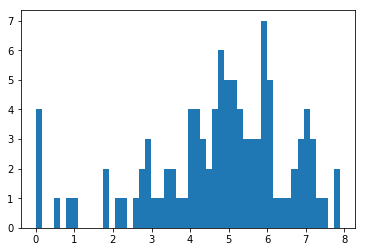

In [14]:
plt.hist(np.log(np.asarray(kilonovae_pausibility)+1),bins=50,label=['kilonovae','Non-kilnovae'])

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([144.,   1.,   1.,   1.,   2.,   0.,   1.,   2.,   2.,   1.,   2.,
          4.,   6.,   7.,   5.,  11.,   5.,  16.,  11.,  17.,  15.,  22.,
         29.,  24.,  39.,  33.,  43.,  65.,  69.,  91., 103., 117., 151.,
        185., 226., 248., 304., 306., 340., 411., 363., 431., 390., 317.,
        314., 244., 244., 204., 158., 122.,  83.,  85.,  45.,  57.,  55.,
         45.,  51.,  50.,  58.,  62.,  61.,  90.,  81., 115., 107., 101.,
         80.,  81.,  65.,  45.,  53.,  40.,  40.,  29.,  22.,  24.,  22.,
         11.,  17.,  14.,   8.,   5.,   2.,  10.,   1.,   6.,   2.,   1.,
          1.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.        ,  0.1478343 ,  0.2956686 ,  0.4435029 ,  0.59133721,
         0.73917151,  0.88700581,  1.03484011,  1.18267441,  1.33050871,
         1.47834301,  1.62617731,  1.77401162,  1.92184592,  2.06968022,
         2.21751452,  2.36534882,  2.51318312,  2.66101742,  2.80885172,
         2.95668603,  3.10

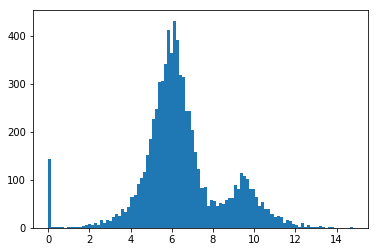

In [15]:
plt.hist(np.log(np.asarray(nonkilo_pausibility)+1),bins=100,label=['kilonovae','Non-kilnovae'])

In [16]:
y1 = np.log(np.asarray(kilonovae_pausibility)+1)
y2 = np.log(np.asarray(nonkilo_pausibility)+1)

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


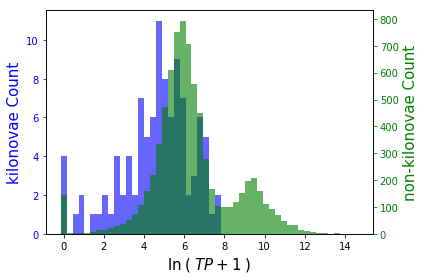

In [17]:
colors = ['b','g']

#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([y1, y2], color=colors)
n, bins, patches = ax1.hist([y1,y2],bins=50)
ax1.cla() 

#plots the histogram data
width = (bins[1] - bins[0])
bins_shifted = bins
ax1.bar(bins[:-1], n[0], width, color=colors[0],alpha = .6,label="kilonova")
ax2.bar(bins[:-1], n[1], width, color=colors[1],alpha = .6, label="non-kilonova")

#finishes the plot
ax1.set_ylabel("kilonovae Count", color=colors[0],fontsize=15)
ax2.set_ylabel("non-kilonovae Count", color=colors[1],fontsize=15)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_xlabel("$\ln{\;(\;TP+1\;)}$",fontsize=15)
fig.savefig("./distribution_of_metric")
plt.tight_layout()
plt.show()